**Task 1: Predicting Restaurant Ratings**

Dataset Preview:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong C

/tmp/ipython-input-275415153.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)



Model Performance:
Mean Squared Error: 0.028
R² Score: 0.988


/tmp/ipython-input-275415153.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


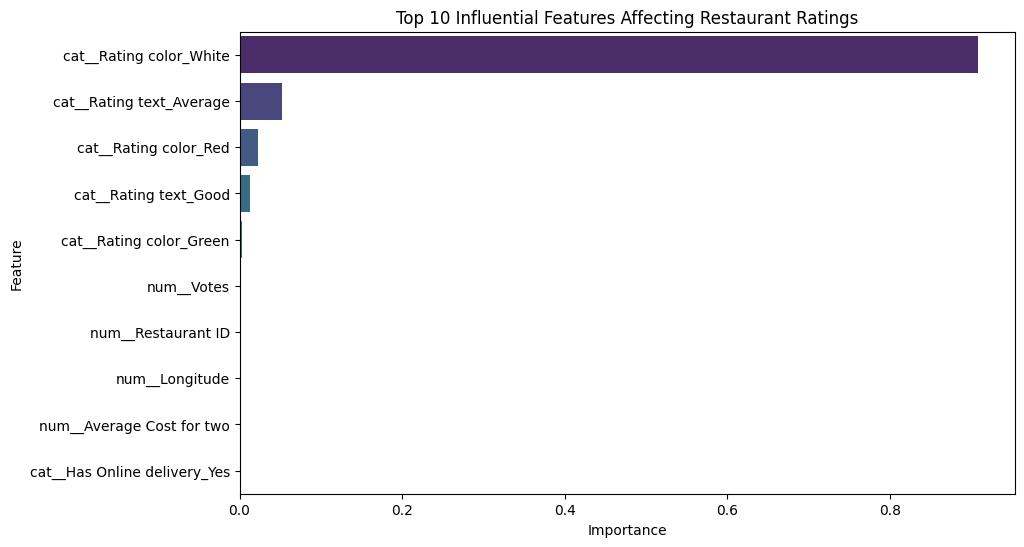


Top Influential Features:
                            Feature  Importance
17163       cat__Rating color_White    0.907559
17165      cat__Rating text_Average    0.052153
17162         cat__Rating color_Red    0.022468
17167         cat__Rating text_Good    0.013243
17160       cat__Rating color_Green    0.002611
17177                    num__Votes    0.000886
17171            num__Restaurant ID    0.000672
17173                num__Longitude    0.000126
17175     num__Average Cost for two    0.000114
17155  cat__Has Online delivery_Yes    0.000058


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset

# Replace with your dataset file name
df = pd.read_csv("/content/Dataset .csv")

# Display first few rows
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Step 3: Handle missing values

# Fill numerical missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 4: Encode categorical variables

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.drop('Aggregate rating', errors='ignore').tolist()


# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Step 5: Define features and target

X = df.drop(columns=['Aggregate rating'])  # Features
y = df['Aggregate rating']                 # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Choose a model (Regression)

# You can switch between models:
# model = LinearRegression()
model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Create pipeline (Preprocessing + Model)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Step 7: Train the model

pipeline.fit(X_train, y_train)

# Step 8: Make predictions

y_pred = pipeline.predict(X_test)

# Step 9: Evaluate model performance

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Step 10: Feature Importance (for Decision Tree)

if isinstance(model, DecisionTreeRegressor):
    # Get feature names after one-hot encoding
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title("Top 10 Influential Features Affecting Restaurant Ratings")
    plt.show()

# Step 11: Model Interpretation

print("\nTop Influential Features:")
print(feature_importance_df)